<a href="https://colab.research.google.com/github/pachterlab/MBGBLHGP_2019/blob/master/notebooks/umicelldist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!date

Sat Feb  6 01:02:05 UTC 2021


In [3]:
!git clone https://github.com/pachterlab/MBGBLHGP_2019.git

fatal: destination path 'MBGBLHGP_2019' already exists and is not an empty directory.


In [4]:
!gunzip -r /content/MBGBLHGP_2019/data/umicelldist-supp_note/*

# Supplementary Note Figure 3

In [18]:
import glob
import pandas as pd
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import itertools
from scipy.optimize import fsolve

from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [2]:
v2_names = np.array(['SRR8599150_v2',
       'heart1k_v2', 'SRR8611943_v2',
       'SRR8257100_v2', 'EMTAB7320_v2',
       'SRR7299563_v2', 'SRR8513910_v2',
       'SRR8639063_v2', 'SRR8524760_v2',
       'SRR6956073_v2', 'hgmm1k_v2',
       'SRR8206317_v2', 'SRR8327928_v2',
       'SRR6998058_v2'], dtype=object)

v3_names = np.array(['pbmc1k_v3', 'hgmm10k_v3',
                     'neuron10k_v3', 'pbmc10k_v3',
                     'heart1k_v3', 'hgmm1k_v3'], dtype=object)

In [3]:
v2_data = {}
v2_data["EMTAB7320_v2"]  = {"n_reads": 335147976}
v2_data["heart1k_v2"]  = {"n_reads": 88872840}
v2_data["hgmm1k_v2"] = {"n_reads": 75225120}
v2_data["SRR6956073_v2"] = {"n_reads": 161274652}
v2_data["SRR6998058_v2"] = {"n_reads": 37227612}
v2_data["SRR7299563_v2"]  = {"n_reads": 112176350}
v2_data["SRR8206317_v2"] = {"n_reads": 85992089}
v2_data["SRR8257100_v2"]  = {"n_reads": 189337914}
v2_data["SRR8327928_v2"] = {"n_reads": 190094560}
v2_data["SRR8513910_v2"]  = {"n_reads": 146617182}
v2_data["SRR8524760_v2"]  = {"n_reads": 97106426}
v2_data["SRR8599150_v2"]  = {"n_reads": 8860361}
v2_data["SRR8611943_v2"]  = {"n_reads": 21574502}
v2_data["SRR8639063_v2"]  = {"n_reads": 416437344}

v2_data["EMTAB7320_v2"]["n_cells"] = 4510
v2_data["heart1k_v2"]["n_cells"] = 712
v2_data["hgmm1k_v2"]["n_cells"] = 1079
v2_data["SRR6956073_v2"]["n_cells"] = 4168
v2_data["SRR6998058_v2"]["n_cells"] = 575
v2_data["SRR7299563_v2"]["n_cells"] = 1660
v2_data["SRR8206317_v2"]["n_cells"] = 4418
v2_data["SRR8257100_v2"]["n_cells"] = 11685
v2_data["SRR8327928_v2"]["n_cells"] = 10396
v2_data["SRR8513910_v2"]["n_cells"] = 726
v2_data["SRR8524760_v2"]["n_cells"] = 3064
v2_data["SRR8599150_v2"]["n_cells"] = 3949
v2_data["SRR8611943_v2"]["n_cells"] = 5194
v2_data["SRR8639063_v2"]["n_cells"] = 6614

In [4]:
v3_data = {}
v3_data["hgmm1k_v3"] = {"n_reads": 63105786}
v3_data["neuron10k_v3"] = {"n_reads": 357111595}
v3_data["pbmc10k_v3"] = {"n_reads": 638901019}
v3_data["pbmc1k_v3"] = {"n_reads": 66601887}
v3_data["heart1k_v3"] = {"n_reads": 84512390}
v3_data["hgmm10k_v3"] = {"n_reads": 721180737}

v3_data["hgmm1k_v3"]["n_cells"] = 1011
v3_data["neuron10k_v3"]["n_cells"] = 11477
v3_data["pbmc10k_v3"]["n_cells"] = 1045
v3_data["pbmc1k_v3"]["n_cells"] = 11790
v3_data["heart1k_v3"]["n_cells"] = 11692
v3_data["hgmm10k_v3"]["n_cells"] = 1227

In [11]:
%%time
for f in glob.glob("/content/MBGBLHGP_2019/data/umicelldist-supp_note/*"):
    name = f.split("/")[-1]
    print(name)
    if "v2" in name:
        # Dataframe of umis and how many cells they occur in
        tmp = np.sort(pd.read_csv(f + "/umicelldist.txt", header=None, sep="\t", names=["umi", "count"])["count"].values)
        v2_data[name]["umicelldist"] = tmp
        
    elif "v3" in name:
        tmp = np.sort(pd.read_csv(f + "/umicelldist.txt", header=None, sep="\t", names=["umi", "count"])["count"].values)

        v3_data[name]["umicelldist"] = tmp


pbmc10k_v3
heart1k_v2
neuron10k_v3
SRR8599150_v2
hgmm1k_v2
SRR7299563_v2
SRR6956073_v2
SRR8639063_v2
pbmc1k_v3
SRR6998058_v2
SRR8206317_v2
SRR8327928_v2
SRR8524760_v2
SRR8611943_v2
hgmm10k_v3
heart1k_v3
EMTAB7320_v2
SRR8257100_v2
hgmm1k_v3
SRR8513910_v2
CPU times: user 52.5 s, sys: 4.43 s, total: 56.9 s
Wall time: 58.1 s


In [12]:
del tmp

# Supplementary Note Figure

In [14]:
names = v2_names 
n3 = v3_names
names = np.append(names, n3)

data =[v2_data[i]["umicelldist"] for i in v2_names]

[data.append(v3_data[i]["umicelldist"]) for i in v3_names]

[None, None, None, None, None, None]

In [16]:
del v2_data, v3_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


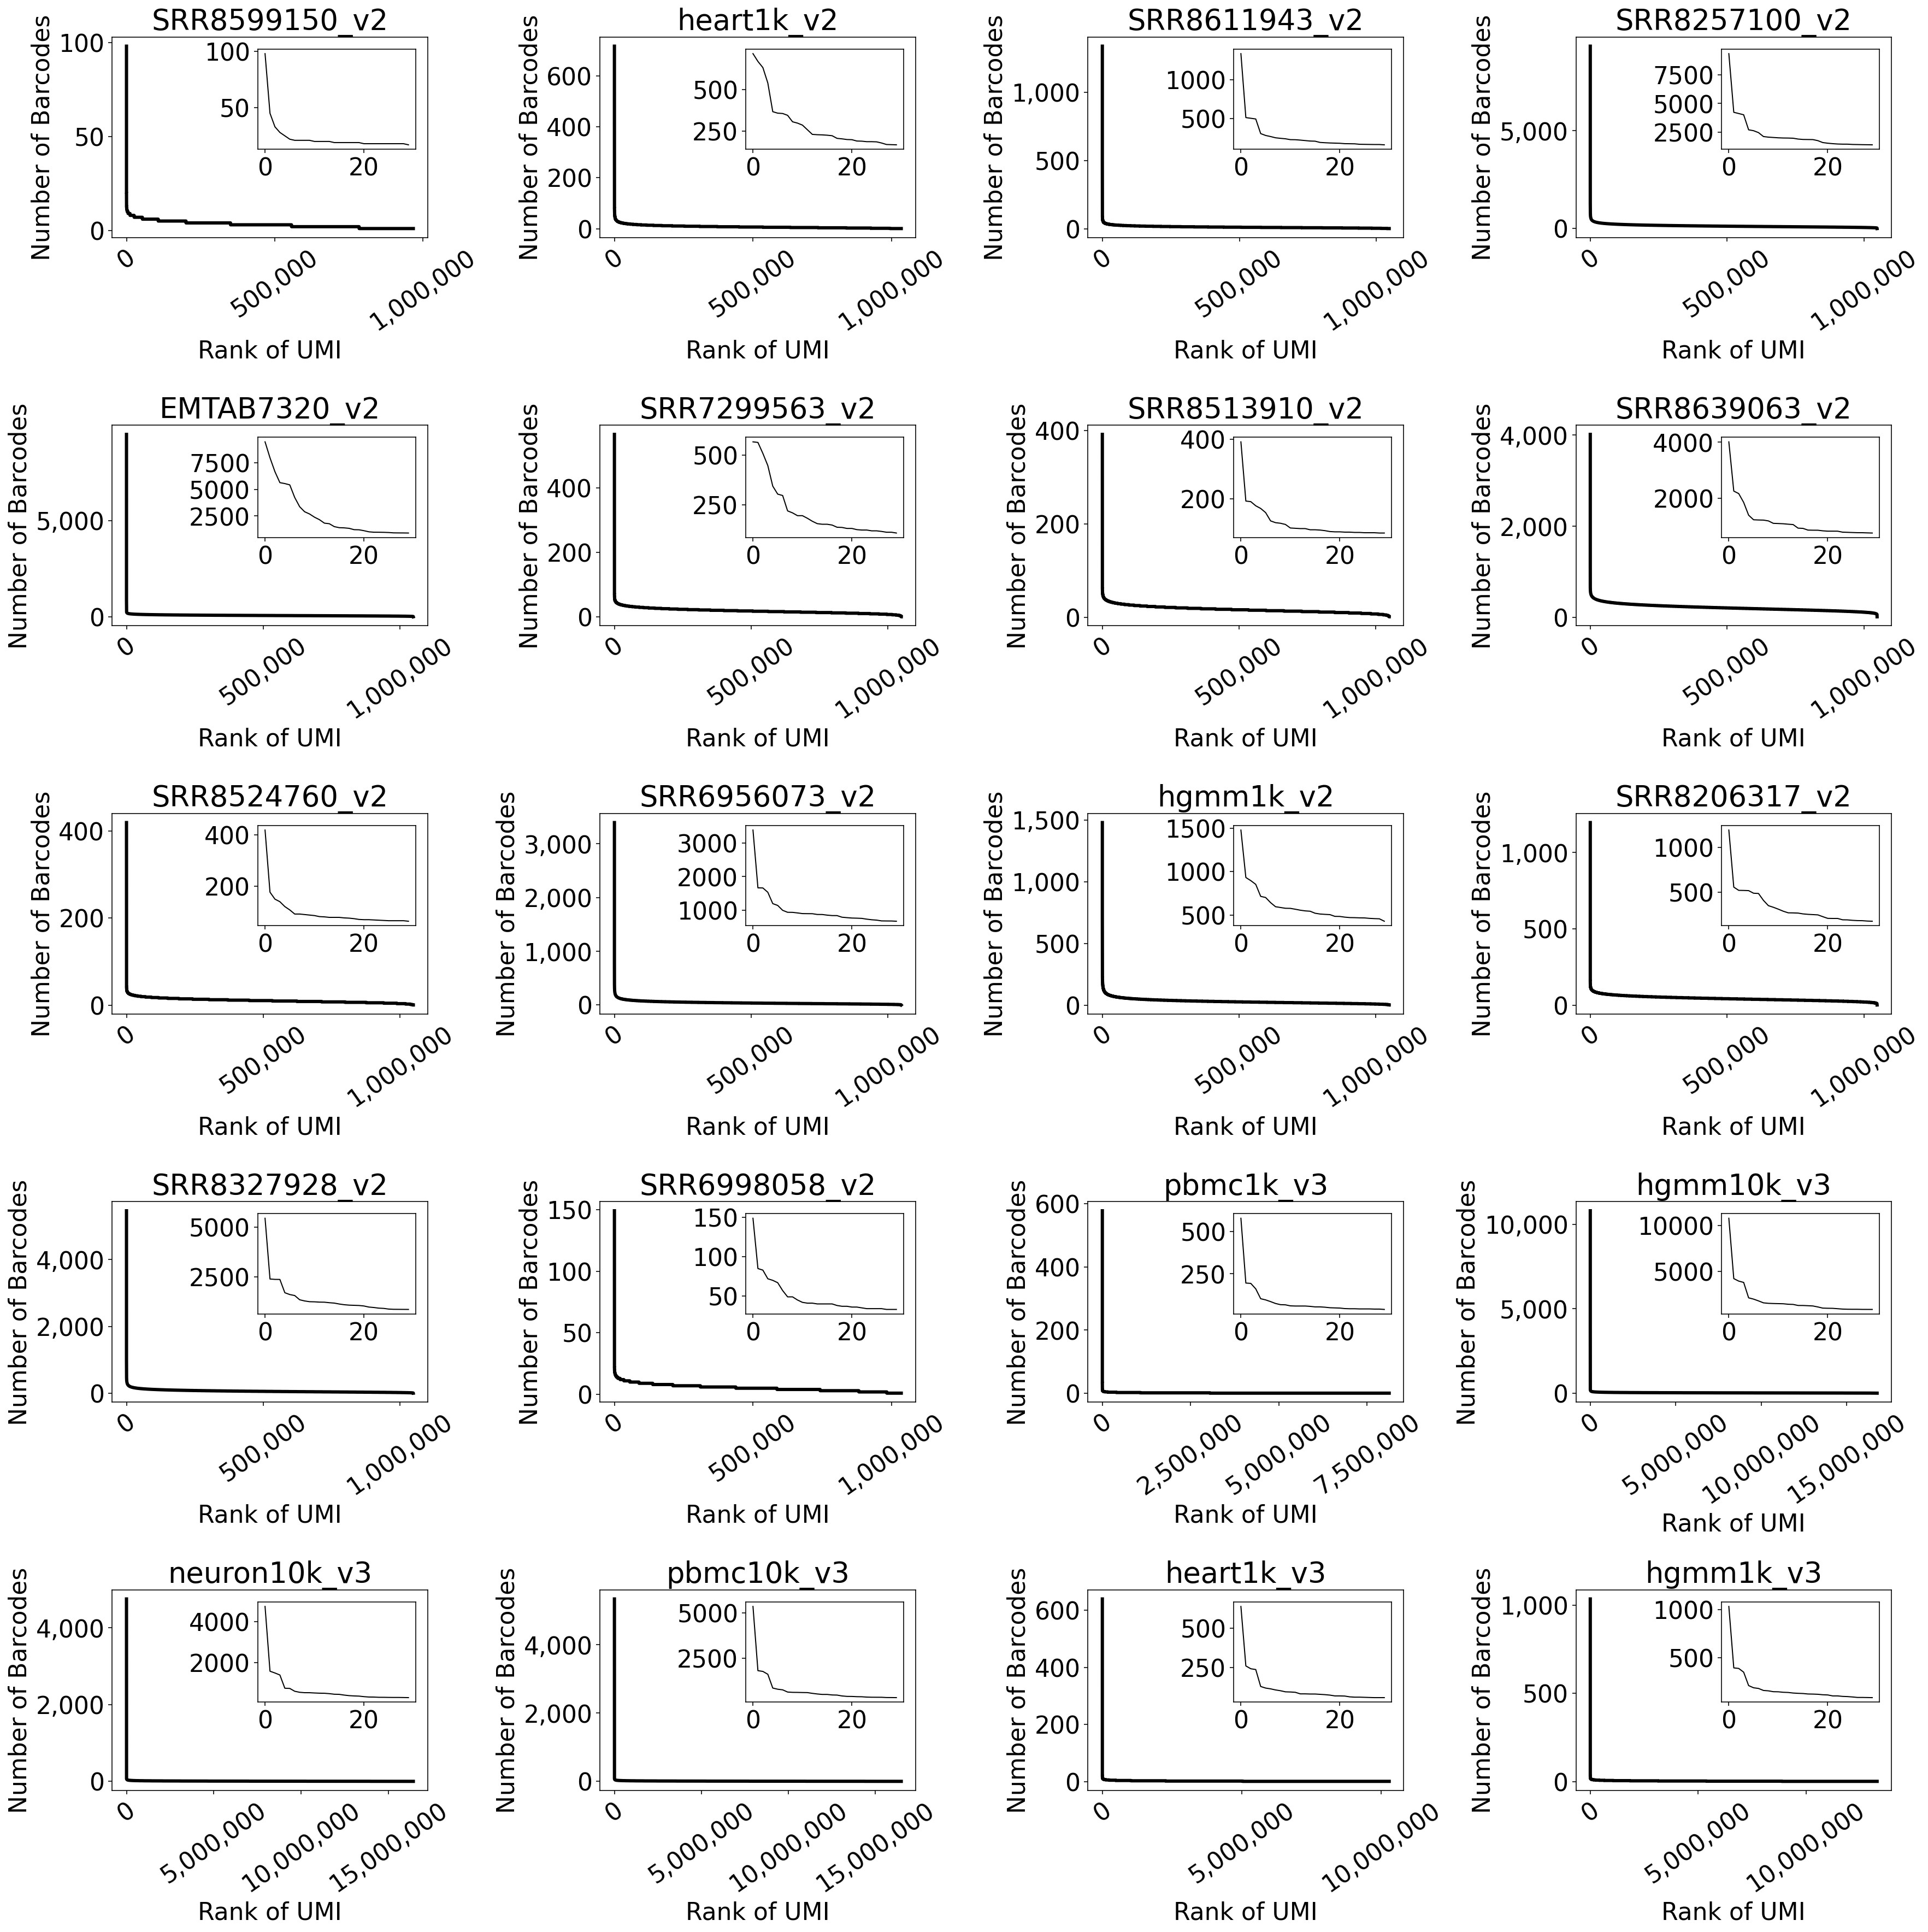

In [19]:
fig, axs = plt.subplots(5,4, figsize=(25, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.75, wspace=0.5)
axs = axs.ravel()

for i in range(len(names)):
    top = 30
    thresh = 1
    
    counts = data[i]


    axs[i].plot(range(len(counts))[::-1], counts, color="k", linewidth=3)
    
    inset = inset_axes(axs[i], width="50%", height="50%", loc=1)
    parts = inset.plot(range(len(counts[-top::]))[::-1], counts[-top::], color="k", linewidth=1)

    axs[i].set_title(names[i])
    
    axs[i].set_xlabel("Rank of UMI")
    axs[i].set_ylabel("Number of Barcodes")
    
    axs[i].get_xaxis().set_visible(True)
    axs[i].get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    axs[i].get_xaxis().set_major_formatter(StrMethodFormatter('{x:,.0f}'))



    for tick in axs[i].get_xticklabels():
        tick.set_rotation(35)
plt.tight_layout()
plt.savefig("all_uniform.pdf")
plt.show()